### Importing essential libraries and modules..

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Conv2D,Flatten
from tensorflow.keras.layers import MaxPooling2D

### Loading the Data..
> As the csv files do not contain any column name or header that is why instead of loding the data as DataFrame, Let's load it in the form of Arrays where the delimeter should be **','**.

In [2]:
X_train=np.loadtxt('input.csv',delimiter=',')
X_test=np.loadtxt('input_test.csv',delimiter=',')

y_train=np.loadtxt('labels.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

### Basic Analysis and Transformations..

In [3]:
X_train.shape### 2000 Images...

(2000, 30000)

In [4]:
X_test.shape

(400, 30000)

In [5]:
y_train.shape

(2000,)

In [6]:
y_test.shape

(400,)

In [9]:
len(X_train[0])

30000

In [12]:
len(X_train[0:,0:1])

2000

- Training data contains 2000 rows and 30000 columns..
- As our data set actually refers to RGB channel images.. So, let's reshape the data into appropriate form..
- Shape of the pictures 100x100 pixels and there are 3 channels..

In [14]:
X_train.reshape(2000,100,100,3).shape

(2000, 100, 100, 3)

In [27]:
X_train=X_train.reshape(2000,100,100,3)
X_test=X_test.reshape(400,100,100,3)

- To train our model in a better way.. We must scale down the pixel values..So We are going to divide each value by 255 as there are 255 pixels in each frame of any channel..

In [29]:
X_train=X_train/255
X_test=X_test/255

### Let's Visualize images..

In [42]:
classes=['Dog','Cat']

Text(0.5, 0, 'Cat')

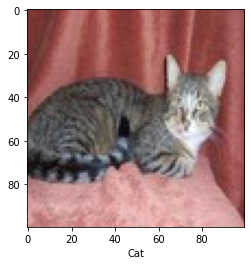

In [53]:
val=1001
plt.imshow(X_train[val])
plt.xlabel(classes[int(y_train[val])])

### Let's build the Model..

>Sequential Models what is does is that : it stack the layers one after another in Sequence..

In [57]:
model=Sequential()

##CNN Layers
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
    
##Dense Layers
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 [==============================] - 16s 496ms/step - loss: 0.7451 - accuracy: 0.5060
Epoch 2/10
32/32 [==============================] - 16s 496ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 16s 497ms/step - loss: 0.6943 - accuracy: 0.5055
Epoch 4/10
32/32 [==============================] - 16s 507ms/step - loss: 0.6868 - accuracy: 0.5485
Epoch 5/10
32/32 [==============================] - 17s 524ms/step - loss: 0.6378 - accuracy: 0.6320
Epoch 6/10
32/32 [==============================] - 16s 500ms/step - loss: 0.5822 - accuracy: 0.6990
Epoch 7/10
32/32 [==============================] - 16s 503ms/step - loss: 0.4882 - accuracy: 0.7690
Epoch 8/10
32/32 [==============================] - 16s 499ms/step - loss: 0.4353 - accuracy: 0.7990
Epoch 9/10
32/32 [==============================] - 16s 497ms/step - loss: 0.3674 - accuracy: 0.8400
Epoch 10/10
32/32 [==============================] - 16s 504ms/step - loss: 0.2832 - accura

In [58]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 1s 52ms/step - loss: 0.8223 - accuracy: 0.6550


[0.8223102688789368, 0.6549999713897705]

- As we do not have a large dataset and the images are difficult to recognize that is why we are getting low performane...

### Model Evaluation..

In [62]:
pred=model.predict(X_test)

In [64]:
final_pred=[]
for i in range(len(pred)):
    if i >.5:
        final_pred.append(1)
    else:
        final_pred.append(0)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
print(confusion_matrix(y_test,final_pred))
print(classification_report(y_test,final_pred))

[[  1 199]
 [  0 200]]
              precision    recall  f1-score   support

         0.0       1.00      0.01      0.01       200
         1.0       0.50      1.00      0.67       200

    accuracy                           0.50       400
   macro avg       0.75      0.50      0.34       400
weighted avg       0.75      0.50      0.34       400



In [70]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 1s 51ms/step - loss: 0.8223 - accuracy: 0.6550


[0.8223102688789368, 0.6549999713897705]

Text(0.5, 15.0, 'Predictions')

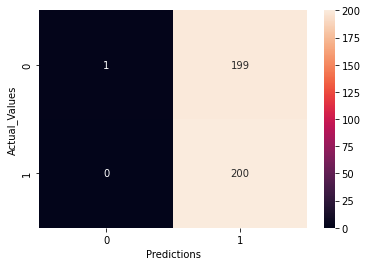

In [74]:
sns.heatmap(confusion_matrix(y_test,final_pred),annot=True,fmt='d')
plt.ylabel('Actual_Values')
plt.xlabel('Predictions')